# Binary classification with Keras neural network

We'll be using this notebook to train our model to detect Pneumonia in the lab.

Original notebook: https://www.kaggle.com/kosovanolexandr/keras-nn-x-ray-predict-pneumonia-86-54

Dataset: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

### Imports

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K

import os
import numpy as np
import pandas as np

import matplotlib.pyplot as plt
%matplotlib inline

### Verify our directories structure

In [3]:
print(os.listdir("./"))

print(os.listdir("./chest_xray"))

print(os.listdir("./chest_xray/test"))

print(os.listdir("./chest_xray/train/"))

print(os.listdir("./chest_xray/val/"))

['chest_xray.tar.gz', 'x-ray-predict-pneumonia-keras-training.ipynb', 'georgia-covidtracking.ipynb', 'chest_xray', '.ipynb_checkpoints', 'create_notifications.ipynb', '.log']
['test', 'val', 'train']
['PNEUMONIA', 'NORMAL']
['PNEUMONIA', 'NORMAL']
['PNEUMONIA', 'NORMAL']


### Check an image in the "NORMAL" training set

NORMAL


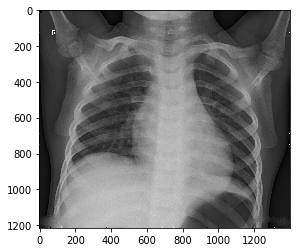

In [4]:
img_name = 'NORMAL2-IM-1423-0001.jpeg'
img_normal = load_img('./chest_xray/train/NORMAL/' + img_name)

print('NORMAL')
plt.imshow(img_normal)
plt.show()

### Check an image in the PNEUMONIA training set

PNEUMONIA


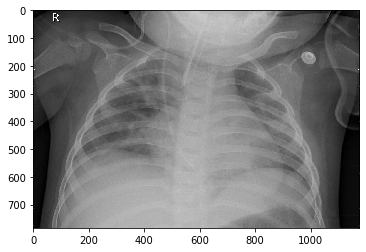

In [5]:
img_name = 'person9_bacteria_41.jpeg'
img_pneumonia = load_img('./chest_xray/train/PNEUMONIA/' + img_name)

print('PNEUMONIA')
plt.imshow(img_pneumonia)
plt.show()

### Initialize variables

In [6]:
# dimensions of our images.
img_width, img_height = 150, 150

In [7]:
train_data_dir = './chest_xray/train'
validation_data_dir = './chest_xray/val'
test_data_dir = './chest_xray/test'

nb_train_samples = 512
nb_validation_samples = 17
epochs = 20
batch_size = 16

In [8]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

### Create Sequential model

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

### Check information about the model

Display some information about the model we're using.

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [11]:
model.input

<tf.Tensor 'conv2d_input:0' shape=(None, 150, 150, 3) dtype=float32>

In [12]:
model.output

<tf.Tensor 'activation_4/Sigmoid:0' shape=(None, 1) dtype=float32>

### Compile the model

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Upload images from the different sets

In [14]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [15]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [16]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 1716 images belonging to 2 classes.


In [17]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 16 images belonging to 2 classes.


In [18]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 624 images belonging to 2 classes.


### Fit the model

In [19]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

2021-04-30 14:27:06,909 [264] WARNING  tensorflow:323: [JupyterRequire] From <ipython-input-19-2dedade68c7a>:6: Model.fit_generator (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/20
32/32 [==============================] - 29s 909ms/step - loss: 0.5830 - accuracy: 0.7891 - val_loss: 0.7726 - val_accuracy: 0.5000
Epoch 2/20
32/32 [==============================] - 28s 872ms/step - loss: 0.5284 - accuracy: 0.7780 - val_loss: 0.8620 - val_accuracy: 0.5000
Epoch 3/20
32/32 [==============================] - 28s 888ms/step - loss: 0.3714 - accuracy: 0.8262 - val_loss: 1.8886 - val_accuracy: 0.5000
Epoch 4/20
32/32 [==============================] - 29s 906ms/step - loss: 0.4043 - accuracy: 0.8301 - val_loss: 0.6020 - val_accuracy: 0.8750
Epoch 5/20
32/32 [==============================] - 28s 881ms/step - loss: 0.3597 - accuracy: 0.8200 - val_loss: 0.5902 - val_accuracy: 0.7500
Epoch 6/20
32/32 [==============================] - 28s 878ms/step - loss: 0.3341 - accuracy: 0.8380 - val_loss: 0.5413 - val_accuracy: 0.7500
Epoch 7/20
32/32 [==============================] - 29s 900ms/step - loss: 0.2868 - accuracy: 0.8574 - val_loss: 0.6307 - val_accuracy: 0.7500

### Save the model (weights + complete model)

In [22]:
model.save_weights('first_try.h5')

In [23]:
model.save('pneumonia_model.h5')

### Evaluate the model

In [24]:
# evaluate the model
scores = model.evaluate_generator(test_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2021-04-29 18:33:36,087 [802] WARNING  tensorflow: From <ipython-input-24-9e0e1c83dcbc>:2: Model.evaluate_generator (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
Please use Model.evaluate, which supports generators.



accuracy: 80.45%
